In [ ]:
from tensorflow import keras
import numpy as np
import cv2
import pandas as pd

In [1]:
model1 = keras.models.load_model('../../models/pre_model_1_1_10_epochs.h5')
model2 = keras.models.load_model('../../models/pre_model_2_6.keras')
model3 = keras.models.load_model('../../models/pre_model_3_1_10_epochs.h5')
model4 = keras.models.load_model('../../models/pre_model_4_1_10_epochs.h5')
model5 = keras.models.load_model('../../models/pre_model_5_1_10_epochs.h5')
model6 = keras.models.load_model('../../models/pre_model_6_1_20_2_epochs.h5')
model7 = keras.models.load_model('../../models/pre_model_7_1_10_epochs.h5')
model8 = keras.models.load_model('../../models/pre_model_8_1_10_epochs.h5')


In [2]:
all_models = [model1,model2, model3,model4,model5,model6,model7,model8]
rule_names = rules = [
            "Kein Scooter",
            "Scooter unvollständig/zu wenig Umgebung",
            "Scooter steht zu nah an Straße (Bordsteinkante)",
            "Scooter steht nicht frei",
            "Scooter auf Grünfläche",
            "Scooter blockiert Fahrradständer",
            "Scooter steht an ÖPNV Haltestelle / Parkverbo",
            "Scooter steht in Einfahrt / im Weg"
        ]

In [4]:
balanced_labels = pd.read_csv('./chosen_labels_all_rules.csv', sep=';',index_col=False)
balanced_labels.describe()

,Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.234694,0.225624,0.119048,0.100907,0.252834,0.379819,0.124717,0.104308
std,0.424048,0.418229,0.324028,0.301376,0.434883,0.485617,0.330585,0.305834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def load_image2(img_path, target_size = (512, 512)):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure image is in correct format
        img = img / 255.0  # Normalize image to the range [0, 1]
    return img

In [9]:
columns=["Image_name","Rule1","Rule2","Rule3","Rule4","Rule5","Rule6","Rule7","Rule8"]
predictions_df = pd.DataFrame(columns=columns)

i=0
folder_path = '../../Yoio_Park_Proof/'

while i < len(balanced_labels):
    
    img_name=balanced_labels['Image_name'][i]
    img = load_image2(folder_path+img_name)
    img_array = np.expand_dims(img, axis=0)
    predictions_array =[img_name]

    for model in all_models:
      predictions = model.predict(img_array)

      if predictions[0][1]>0.5:
        int_pred=1
      else:
        int_pred=0   
      predictions_array.append(int_pred)
      
    predictions_df.loc[len(predictions_df)] = predictions_array
    i += 1
    i += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━

In [22]:
predictions_df.describe()

,Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.232426,0.234694,0.225624,0.239229,0.328798,0.439909,0.214286,0.265306
std,0.422619,0.424048,0.418229,0.426855,0.470043,0.496658,0.410559,0.441747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
predictions_df.to_csv('./predicted_labels_all.csv', sep=';', index=False)

In [3]:
#If you don´t want to create new predictions
import pandas as pd
predictions_df = pd.read_csv('./predicted_labels_all.csv', sep=';',index_col=False)

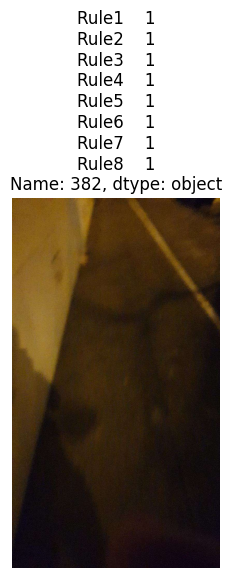

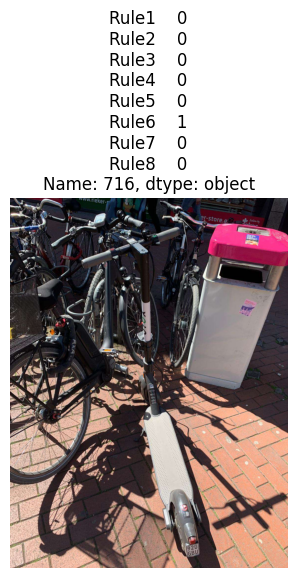

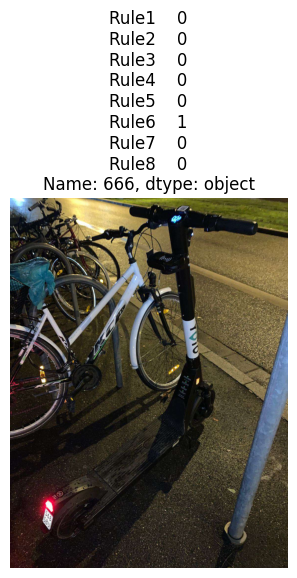

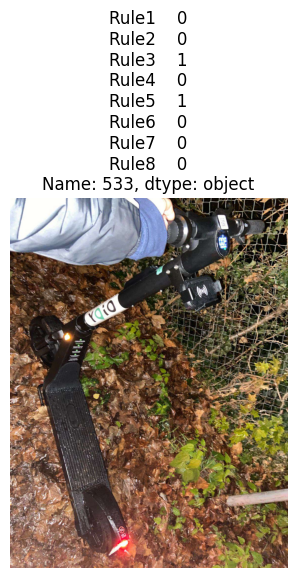

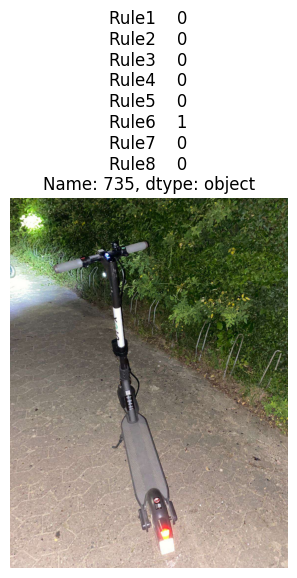

In [25]:
#show some random predictions with images
import cv2
import random
import matplotlib.pyplot as plt
folder_path = '../Yoio_Park_Proof/'

for i in range(5):   
    random_index = random.randint(0, len(predictions_df))
    img_name = predictions_df['Image_name'][random_index]
    img = cv2.imread(folder_path+img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(predictions_df.iloc[random_index][1:])
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print('\n')